## Homework 3. R lang.
#### Копин Борис Александрович

1. Список вакансии с “The Official Website of the City of New York” https://data.cityofnewyork.us/Business/NYC-Jobs/kpav-sd4t

Посчитать распределение имеющихся вакансий по зарплате (считать, что если для вакансии указан диапазон зарплат, реальная зарплата будет равна среднему минимальной и максимальной границ). Построить гистограмму и boxplot для полученного распределения.

In [15]:
library(plyr)
library(ggplot2)

In [16]:
x <- read.csv('../hw2_python/NYC_Jobs.csv', stringsAsFactors=FALSE)

In [17]:
unique(x["Salary.Frequency"])

,Salary.Frequency
1,Annual
5,Hourly
19,Daily


In [18]:
vacancies = x[,c("Business.Title","Salary.Range.From","Salary.Range.To","Salary.Frequency")]

In [33]:
cdata <- ddply(vacancies, c("Business.Title", "Salary.Frequency"),
               summarise,
               min=min(Salary.Range.From),
               max=max(Salary.Range.To))
cdata$mid <- (cdata$max - cdata$min / 2)
head(cdata)

,Business.Title,Salary.Frequency,min,max,mid
1,.Net Developer,Annual,83323,105000,63338.5
2,.NET Programmer / Analyst,Annual,83099,85000,43450.5
3,.NET Programmer; PowerBuilder Programmer/Analyst,Annual,83099,85000,43450.5
4,(FMS) INTEGRATION / SYSTEM TESTER,Annual,83323,100000,58338.5
5,311 Call Center Manager,Annual,49492,72000,47254
6,311 Call Center Supervisor,Annual,56060,64469,36439


In [34]:
cdata_annual <- cdata[cdata$Salary.Frequency == 'Annual',][c('min', 'max', 'mid')]
cdata_hourly <- cdata[cdata$Salary.Frequency == 'Hourly',][c('min', 'max', 'mid')]
cdata_daily  <- cdata[cdata$Salary.Frequency == 'Daily', ][c('min', 'max', 'mid')]

In [81]:
density_plot <- function(x, title) {
    mins <- data.frame(salary = x$min)
    maxs <- data.frame(salary = x$max)
    mids <- data.frame(salary = x$mid)

    mins$legend <- 'min'
    maxs$legend <- 'max'
    mids$legend <- 'mid'

    salaries <- rbind(mins, maxs, mids)

    bp <- ggplot(salaries, aes(salary, fill = legend)) + geom_density(alpha = 0.2) + ggtitle(title)
    return(bp)
}

In [82]:
box_plot <- function(x, title) {
    par(cex=0.8)
    boxplot(
        x$max, x$mid, x$min,
        names=c('Max\nSalary', 'Mid\nSalary', 'Min\nSalary'),
        col=c('#F8766D', '#00BFC4', '#00BA38'),
        main=title
    )
}

# Построить гистограмму для распределения зарплат.

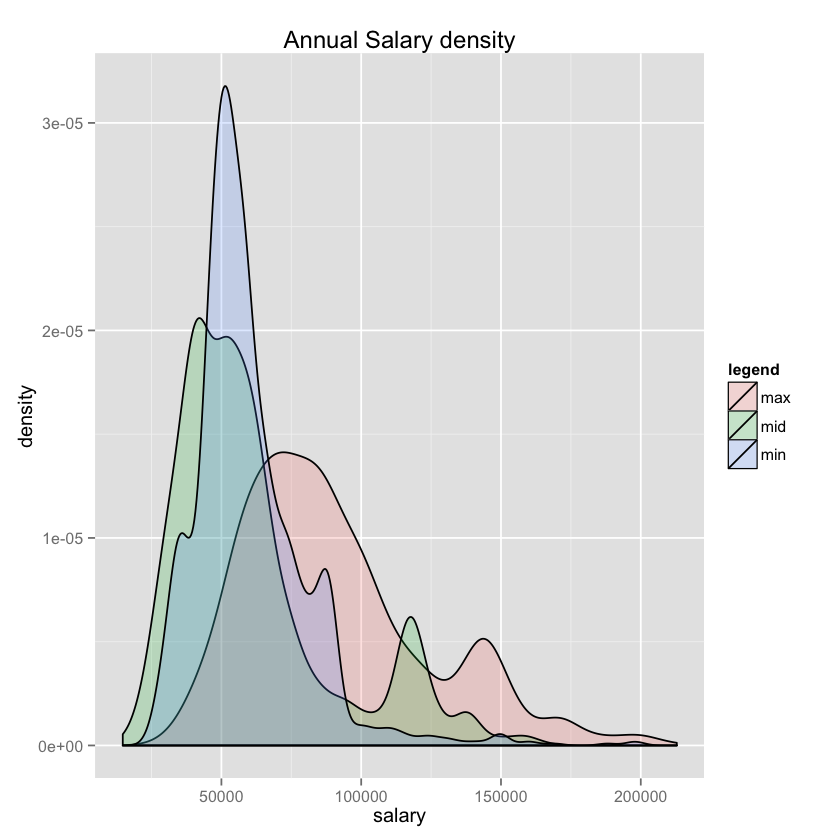

In [83]:
density_plot(cdata_annual, 'Annual Salary density')

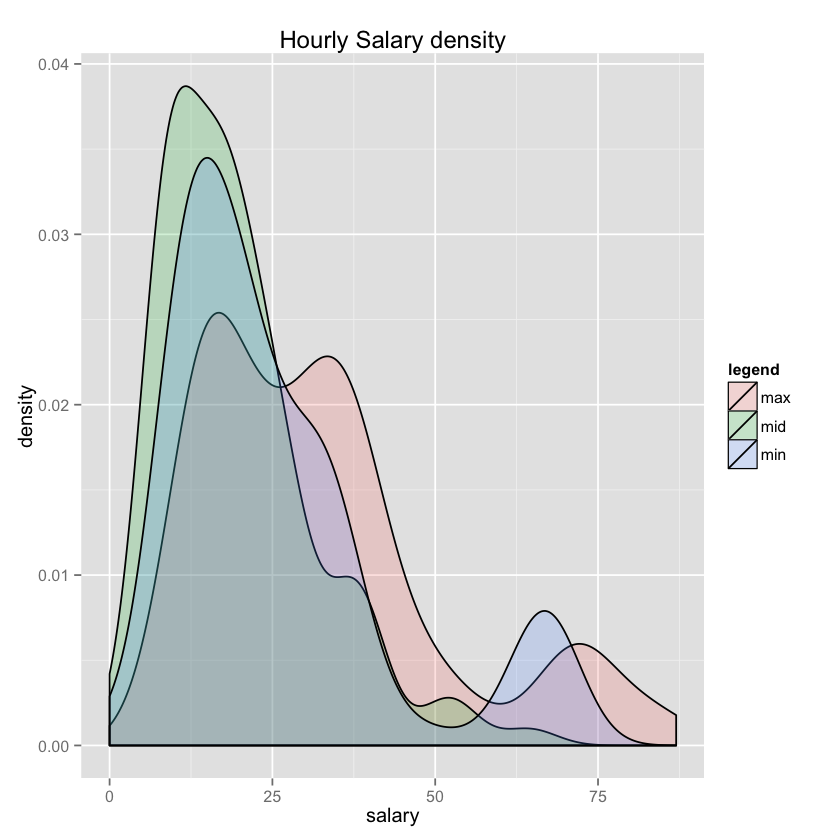

In [84]:
density_plot(cdata_hourly, 'Hourly Salary density')

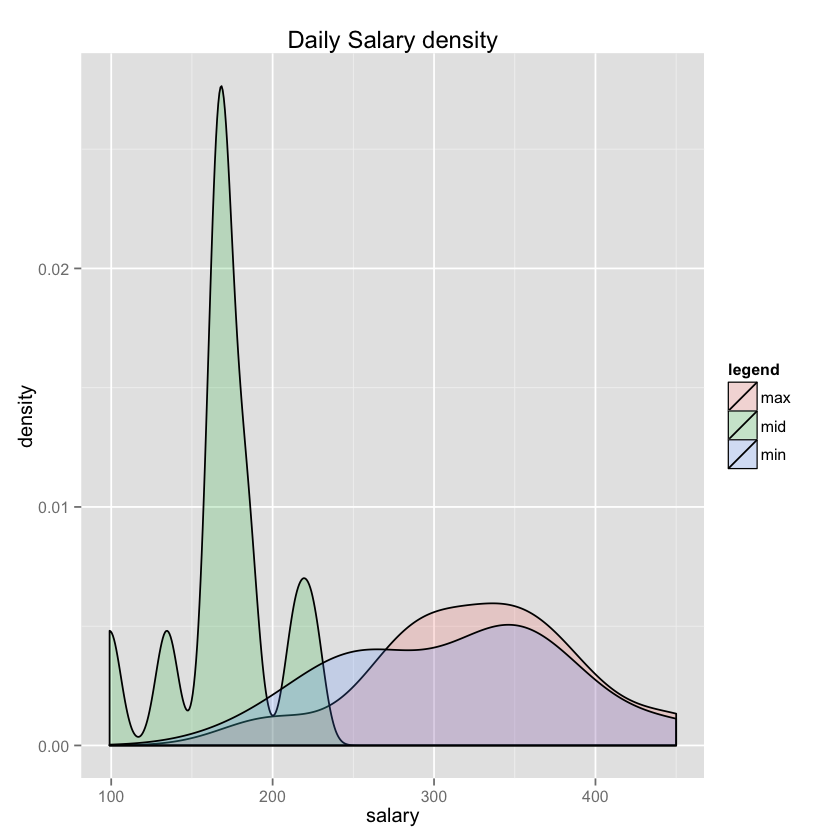

In [85]:
density_plot(cdata_daily, 'Daily Salary density')

# Построить boxplot для распределения зарплат.

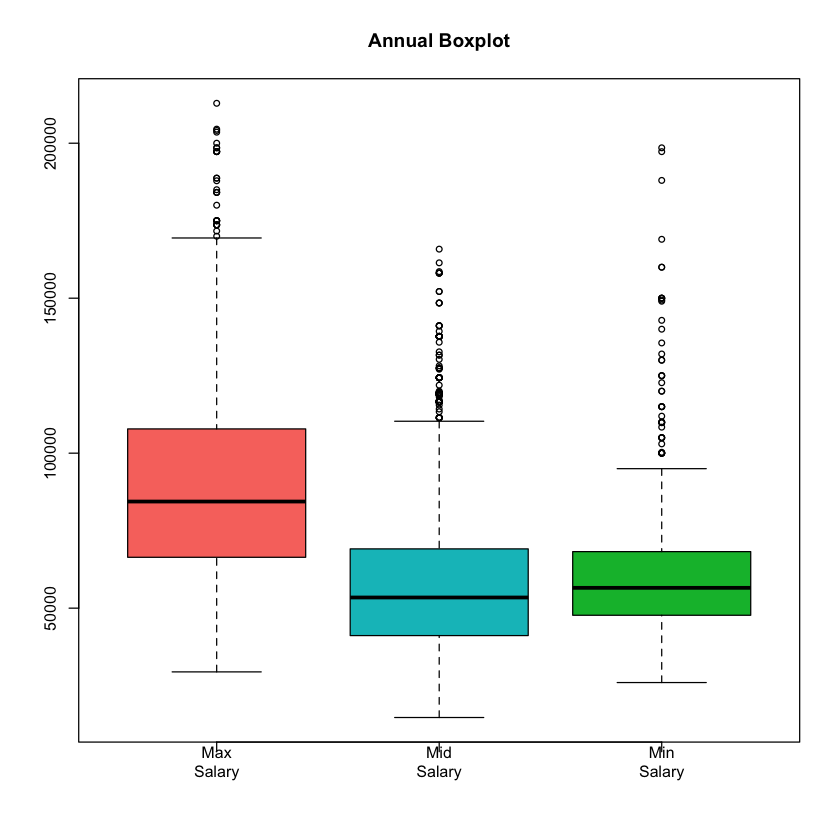

In [86]:
box_plot(cdata_annual, "Annual Boxplot")

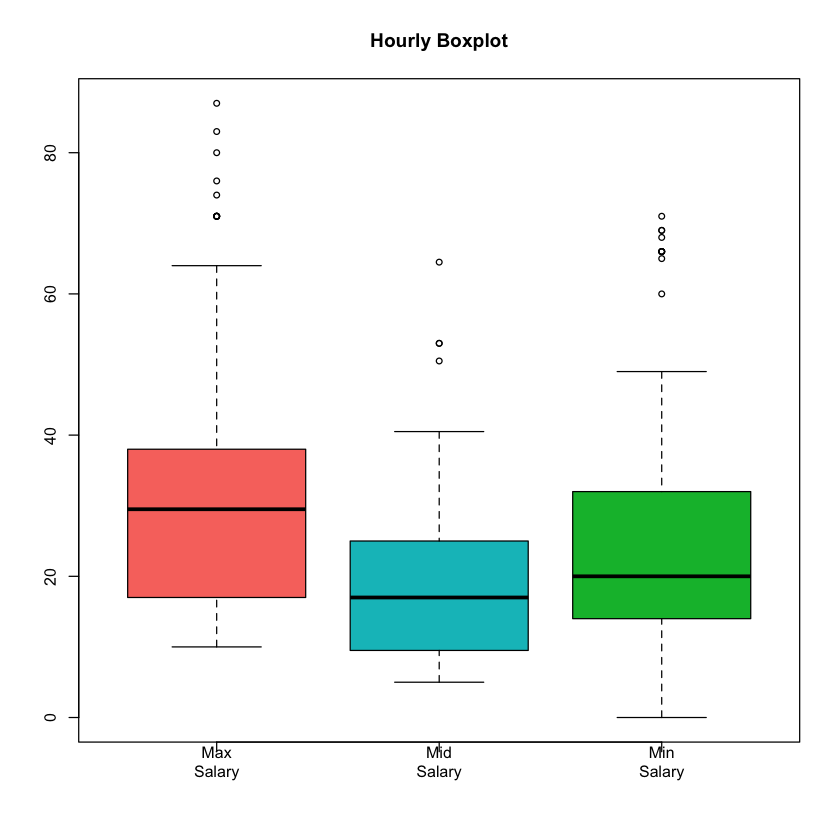

In [87]:
box_plot(cdata_hourly, "Hourly Boxplot")

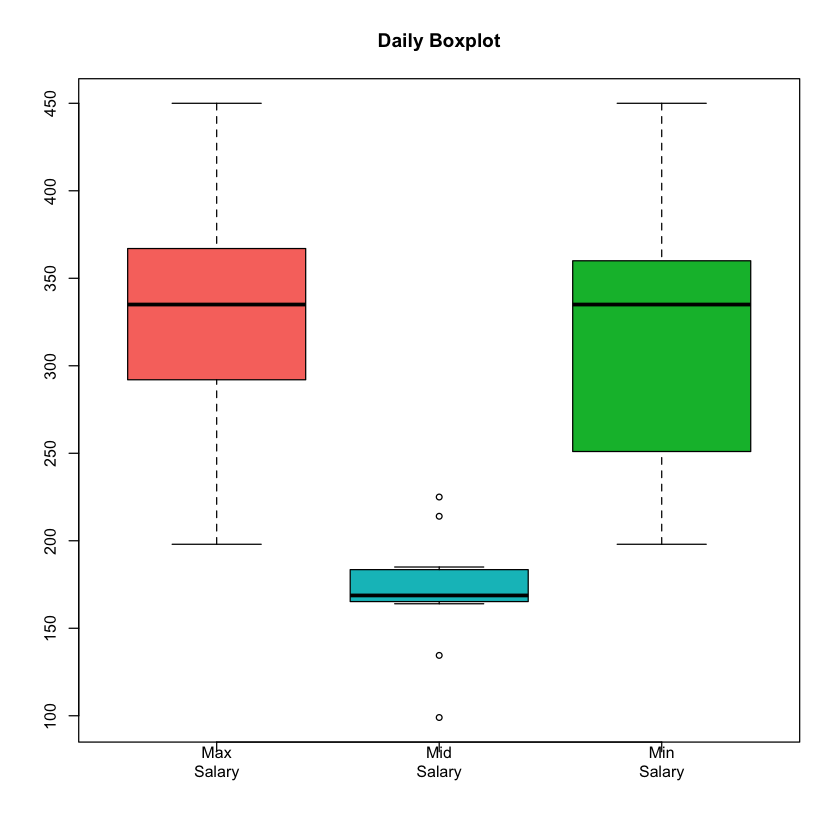

In [88]:
box_plot(cdata_daily, "Daily Boxplot")

# Extra materials

In [67]:
set.seed(1234)
dat <- data.frame(cond = factor(rep(c("A","B"), each=200)), 
                   rating = c(rnorm(200),rnorm(200, mean=.8)))
# View first few rows
head(dat)
#>   cond     rating
#> 1    A -1.2070657
#> 2    A  0.2774292
#> 3    A  1.0844412
#> 4    A -2.3456977
#> 5    A  0.4291247
#> 6    A  0.5060559

library(ggplot2)

,cond,rating
1,A,-1.207066
2,A,0.2774292
3,A,1.084441
4,A,-2.345698
5,A,0.4291247
6,A,0.5060559


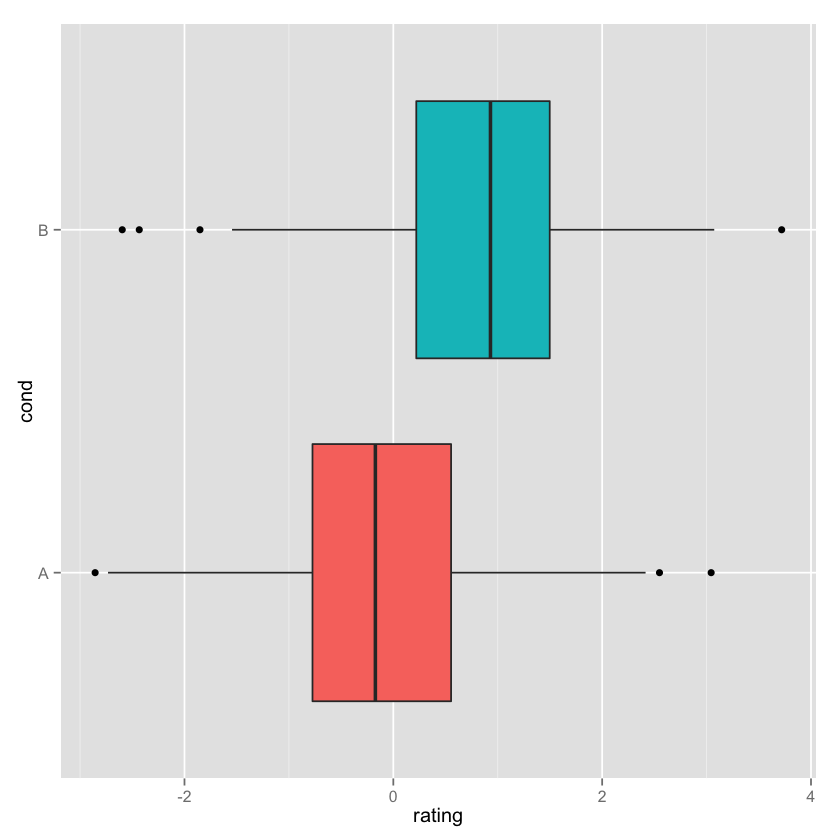

In [68]:

# With flipped axes
ggplot(cdata, aes(x=Salary.Frequency, y=min, fill=cond)) + geom_boxplot() + 
    guides(fill=FALSE) + coord_flip()

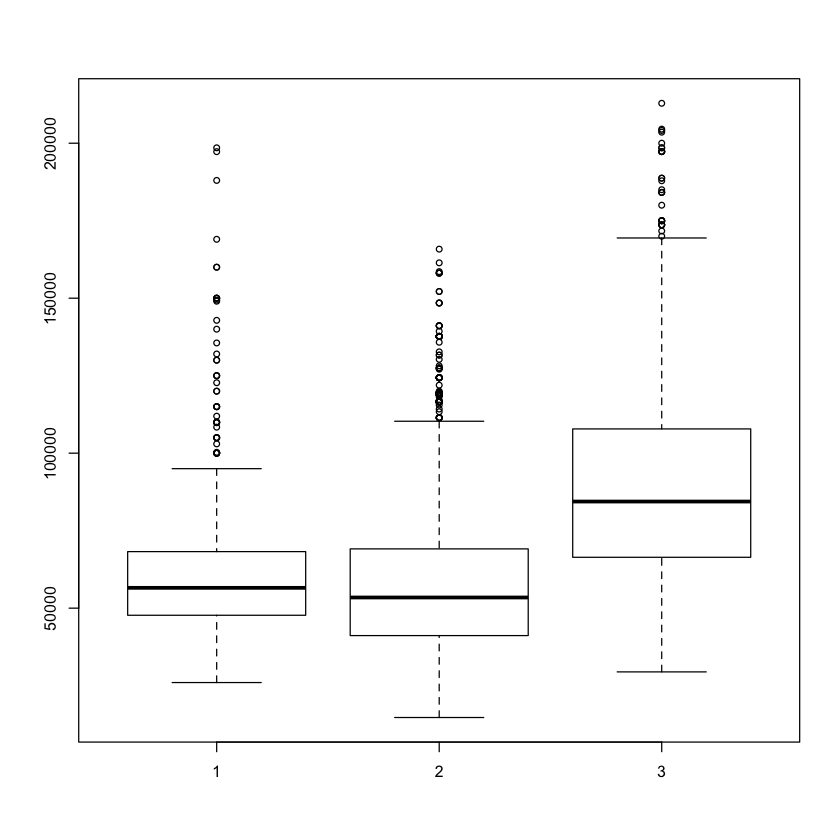

In [69]:
par(cex=0.8)
boxplot(cdata_annual$min, cdata_annual$mid, cdata_annual$max)

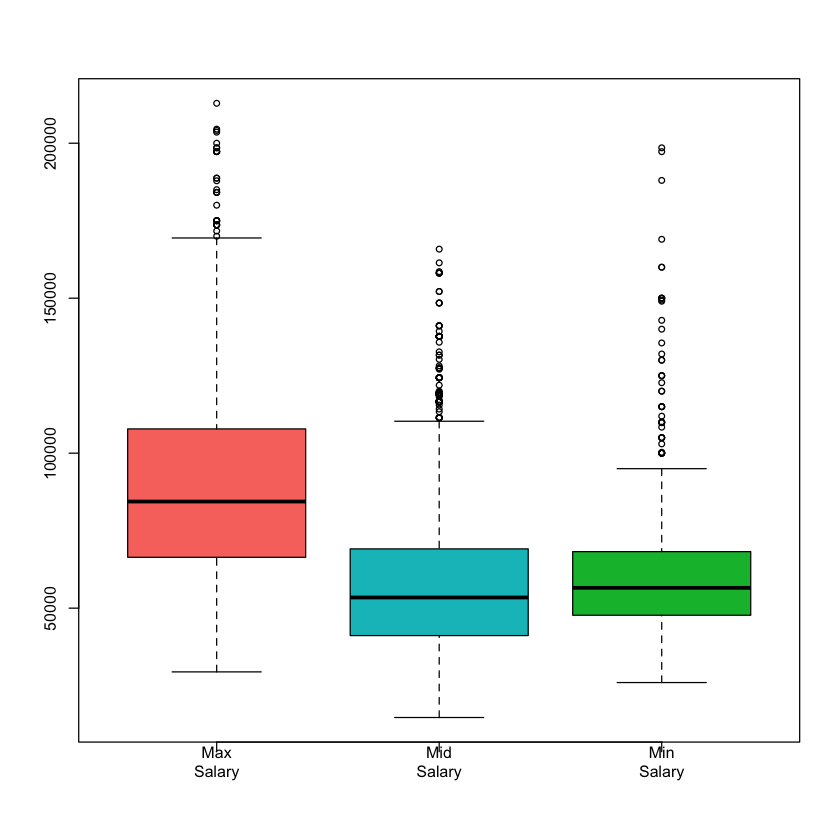

In [75]:
par(cex=0.8)
boxplot(
    cdata_annual$max, cdata_annual$mid, cdata_annual$min,
    names=c('Max\nSalary', 'Mid\nSalary', 'Min\nSalary'),
    col=c('#F8766D', '#00BFC4', '#00BA38'),
    main="Car Milage Data"
)

In [19]:
x1 <- x[x$Salary.Frequency == 'Annual',]

In [ ]:
vacancies = x[,c("Business.Title","Salary.Range.From","Salary.Range.To","Salary.Frequency")]

In [ ]:
x1

In [ ]:
x[x$Salary.Frequency %in% c("Annual"),]

In [70]:
# x[x["Salary.Frequency"] == "Annual"]
# subset(x, "Salary.Frequency" == "Annual")
x[x["Salary.Frequency"] == factor("Annual"), ]

Warning message:
In `[.data.frame`(x, x["Salary.Frequency"] == factor("Annual"), : Incompatible methods ("Ops.data.frame", "Ops.factor") for "=="

ERROR: Error in x["Salary.Frequency"] == factor("Annual"): comparison of these types is not implemented


In [ ]:
x[x[["Salary.Frequency"]] == 'Annual',]

Warning message:
In `[<-.factor`(`*tmp*`, ri, value = "⋮"): invalid factor level, NA generatedWarning message:
In `[<-.factor`(`*tmp*`, ri, value = "⋮"): invalid factor level, NA generatedWarning message:
In `[<-.factor`(`*tmp*`, ri, value = "⋮"): invalid factor level, NA generatedWarning message:
In `[<-.factor`(`*tmp*`, ri, value = "⋮"): invalid factor level, NA generatedWarning message:
In `[<-.factor`(`*tmp*`, ri, value = "⋮"): invalid factor level, NA generatedWarning message:
In `[<-.factor`(`*tmp*`, ri, value = "⋮"): invalid factor level, NA generatedWarning message:
In `[<-.factor`(`*tmp*`, ri, value = "⋱"): invalid factor level, NA generatedWarning message:
In `[<-.factor`(`*tmp*`, ri, value = "⋮"): invalid factor level, NA generatedWarning message:
In `[<-.factor`(`*tmp*`, ri, value = "⋮"): invalid factor level, NA generatedWarning message:
In `[<-.factor`(`*tmp*`, ri, value = "⋮"): invalid factor level, NA generatedWarning message:
In `[<-.factor`(`*tmp*`, ri, value = "⋮"): 

In [11]:
colnames(x)

[1] "Job.ID"                    "Agency"                   
 [3] "Posting.Type"              "X..Of.Positions"          
 [5] "Business.Title"            "Civil.Service.Title"      
 [7] "Title.Code.No"             "Level"                    
 [9] "Salary.Range.From"         "Salary.Range.To"          
[11] "Salary.Frequency"          "Work.Location"            
[13] "Division.Work.Unit"        "Job.Description"          
[15] "Minimum.Qual.Requirements" "Preferred.Skills"         
[17] "Additional.Information"    "To.Apply"                 
[19] "Hours.Shift"               "Work.Location.1"          
[21] "Recruitment.Contact"       "Residency.Requirement"    
[23] "Posting.Date"              "Post.Until"               
[25] "Posting.Updated"           "Process.Date"

In [21]:
x[["Business.Title"]]

ERROR: Error in parse(text = x, srcfile = src): <text>:1:22: unexpected symbol
1: x[["Business.Title"]].count
                         ^


In [27]:
as.data.frame(table(x[, c("Business.Title")]))

Warning message:
In `[<-.factor`(`*tmp*`, ri, value = "⋮"): invalid factor level, NA generatedWarning message:
In `[<-.factor`(`*tmp*`, ri, value = "⋮"): invalid factor level, NA generated

,Var1,Freq
1,311 Call Center Manager,3
2,311 Call Center Supervisor,4
3,311 Content Management Associate,2
4,311 Escalation Line Team Leader,1
5,311 Incident Management Associate,2
6,311 NLU Program Associate,2
7,Accountable Manager,2
8,Accountant,4
9,Accounting Manager,1
10,Account Manager,1


In [18]:
x[,c("Salary.Range.From","Salary.Range.To")]

,Salary.Range.From,Salary.Range.To
1,94983,94983
2,94983,94983
3,54740,146276
4,54740,146276
5,35,35
6,35,35
7,40623,50572
8,40623,50572
9,52670,67459
10,52670,67459


In [25]:
dummyData = rep(c(1,2, 2, 2), 25)

table(dummyData)
# dummyData
#  1  2 
# 25 75

## or another presentation of the same data
as.data.frame(table(dummyData))
#    dummyData Freq
#  1         1   25
#  2         2   75

dummyData
 1  2 
25 75 

,dummyData,Freq
1,1,25
2,2,75


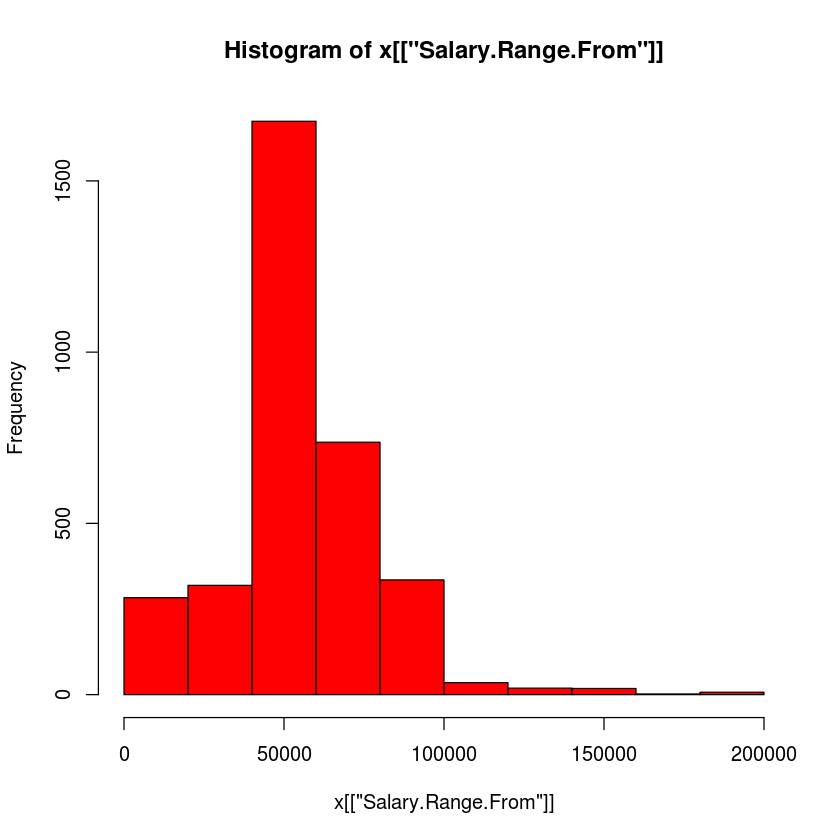

In [33]:

hist(x[["Salary.Range.From"]], breaks=10, col="red")

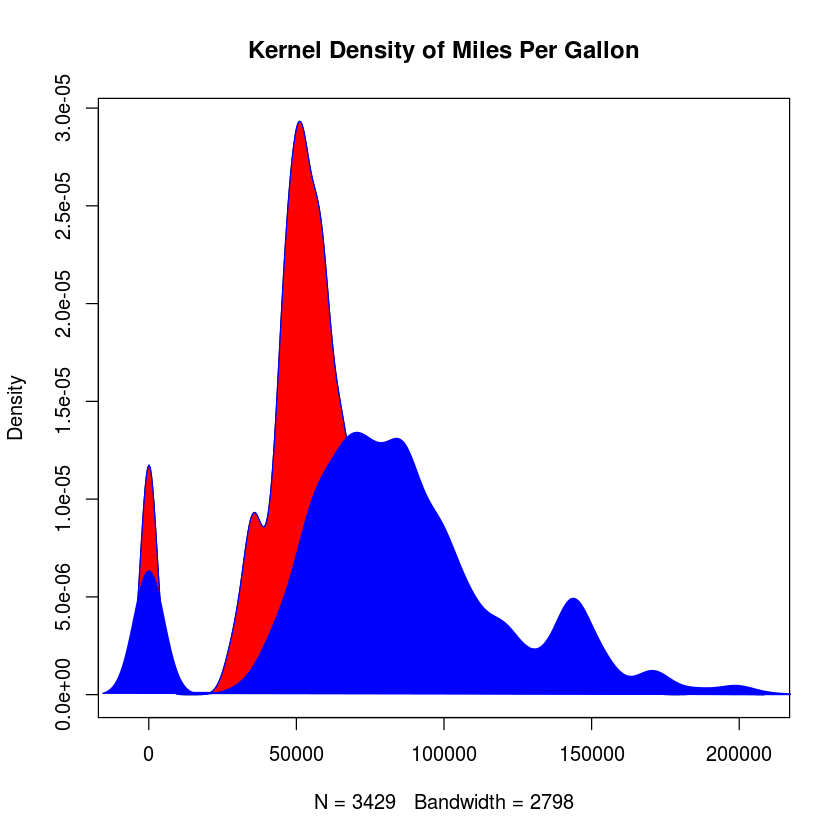

In [41]:
d <- density(x[["Salary.Range.From"]])
plot(d, main="Kernel Density of Miles Per Gallon")
d1 <- density(x[["Salary.Range.To"]])
# plot(d1, main="1Kernel Density of Miles Per Gallon")
polygon(d, col="red", border="blue")
polygon(d1, col="blue", border="blue")

In [39]:
# Compare MPG distributions for cars with 
# 4,6, or 8 cylinders
library(sm)
attach(mtcars)

# create value labels 
cyl.f <- factor(cyl, levels= c(4,6,8),
  labels = c("4 cylinder", "6 cylinder", "8 cylinder")) 

# plot densities 
sm.density.compare(mpg, cyl, xlab="Miles Per Gallon")
title(main="MPG Distribution by Car Cylinders")

# add legend via mouse click
colfill<-c(2:(2+length(levels(cyl.f)))) 
legend(locator(1), levels(cyl.f), fill=colfill)

ERROR: Error in library(sm): there is no package called ‘sm’


ERROR: Error in eval(expr, envir, enclos): could not find function "sm.density.compare"


ERROR: Error in title(main = "MPG Distribution by Car Cylinders"): plot.new has not been called yet


ERROR: Error in locator(1): plot.new has not been called yet


In [52]:
hsb2.small <- read.csv("http://www.ats.ucla.edu/stat/data/hsb2_small.csv")

In [53]:
names(hsb2.small)

[1] "id"      "female"  "race"    "ses"     "schtyp"  "prog"    "read"   
 [8] "write"   "math"    "science" "socst"

In [56]:
head(hsb2.small[, c(1, 7, 8)])

,id,read,write
1,70,57,52
2,121,68,59
3,86,44,33
4,141,63,44
5,172,47,52
6,113,44,52


In [58]:
head(hsb2.small[, 1:4])

,id,female,race,ses
1,70,0,4,1
2,121,1,4,2
3,86,0,4,3
4,141,0,4,3
5,172,0,4,2
6,113,0,4,2


In [59]:
hsb2.small[1:4,]

,id,female,race,ses,schtyp,prog,read,write,math,science,socst
1,70,0,4,1,1,1,57,52,41,47,57
2,121,1,4,2,1,3,68,59,53,63,61
3,86,0,4,3,1,1,44,33,54,58,31
4,141,0,4,3,1,3,63,44,47,53,56


,id,female,race,ses,schtyp,prog,read,write,math,science,socst
1,70,0,4,1,1,1,57,52,41,47,57
2,121,1,4,2,1,3,68,59,53,63,61
3,86,0,4,3,1,1,44,33,54,58,31
4,141,0,4,3,1,3,63,44,47,53,56
5,172,0,4,2,1,2,47,52,57,53,61
6,113,0,4,2,1,2,44,52,51,63,61
7,50,0,3,2,1,1,50,59,42,53,61
8,11,0,1,2,1,2,34,46,45,39,36
9,84,0,4,2,1,1,63,57,54,58,51
10,48,0,3,2,1,2,57,55,52,50,51


In [66]:
hsb2.small[hsb2.small["ses"] == 1, ]

,id,female,race,ses,schtyp,prog,read,write,math,science,socst
1,70,0,4,1,1,1,57,52,41,47,57
15,38,0,3,1,1,2,45,57,50,31,56
16,115,0,4,1,1,1,42,49,43,50,56


In [84]:
sp <- combn(c("sp1","sp2","sp3","sp4"),2)
d <- data.frame(t(sp),"freq"=sample(0:100,6))
x1 <- c("sp3")
x2 <- c("sp3","sp4")
d[d$X1 %in% c("sp3"),]

,X1,X2,freq


In [74]:
d

,X1,X2,freq
1,sp1,sp2,13
2,sp1,sp3,18
3,sp1,sp4,89
4,sp2,sp3,33
5,sp2,sp4,49
6,sp3,sp4,35


In [73]:
sp

sp1,sp1,sp1,sp2,sp2,sp3
sp2,sp3,sp4,sp3,sp4,sp4


In [72]:
sub

,X1,X2,freq
2,sp1,sp3,18
3,sp1,sp4,89
4,sp2,sp3,33
5,sp2,sp4,49


In [8]:
fixed <- data.frame("Type" = character(3), "Amount" = numeric(3))
str(fixed)

'data.frame':	3 obs. of  2 variables:
 $ Type  : Factor w/ 1 level "": 1 1 1
 $ Amount: num  0 0 0


In [9]:
fixed <- data.frame("Type" = character(3), "Amount" = numeric(3), stringsAsFactors=FALSE)
fixed[1, ] <- c("lunch", 100)
str(fixed)

'data.frame':	3 obs. of  2 variables:
 $ Type  : chr  "lunch" "" ""
 $ Amount: chr  "100" "0" "0"


In [18]:
fixed[fixed$Type == 'lunch',]

,Type,Amount
1,lunch,100


In [8]:
vacancies = x[,c("Business.Title","Salary.Range.From","Salary.Range.To","Salary.Frequency")]

In [31]:
x1 <- vacancies[data$Salary.Frequency == 'Annual',]

In [32]:
x1

,Salary.Range.From,Salary.Range.To,Salary.Frequency
1,94983,94983,Annual
2,94983,94983,Annual
3,54740,146276,Annual
4,54740,146276,Annual
7,40623,50572,Annual
8,40623,50572,Annual
9,52670,67459,Annual
10,52670,67459,Annual
11,73034,107985,Annual
12,54740,146276,Annual


In [33]:
data <- read.table(header=TRUE, text='
 subject sex condition before after change
       1   F   placebo   10.1   6.9   -3.2
       2   F   placebo    6.3   4.2   -2.1
       3   M   aspirin   12.4   6.3   -6.1
       4   F   placebo    8.1   6.1   -2.0
       5   M   aspirin   15.2   9.9   -5.3
       6   F   aspirin   10.9   7.0   -3.9
       7   F   aspirin   11.6   8.5   -3.1
       8   M   aspirin    9.5   3.0   -6.5
       9   F   placebo   11.5   9.0   -2.5
      10   M   placebo   11.9  11.0   -0.9
      11   F   aspirin   11.4   8.0   -3.4
      12   M   aspirin   10.0   4.4   -5.6
      13   M   aspirin   12.5   5.4   -7.1
      14   M   placebo   10.6  10.6    0.0
      15   M   aspirin    9.1   4.3   -4.8
      16   F   placebo   12.1  10.2   -1.9
      17   F   placebo   11.0   8.8   -2.2
      18   F   placebo   11.9  10.2   -1.7
      19   M   aspirin    9.1   3.6   -5.5
      20   M   placebo   13.5  12.4   -1.1
      21   M   aspirin   12.0   7.5   -4.5
      22   F   placebo    9.1   7.6   -1.5
      23   M   placebo    9.9   8.0   -1.9
      24   F   placebo    7.6   5.2   -2.4
      25   F   placebo   11.8   9.7   -2.1
      26   F   placebo   11.8  10.7   -1.1
      27   F   aspirin   10.1   7.9   -2.2
      28   M   aspirin   11.6   8.3   -3.3
      29   F   aspirin   11.3   6.8   -4.5
      30   F   placebo   10.3   8.3   -2.0
 ')

In [34]:
library(plyr)

# Run the functions length, mean, and sd on the value of "change" for each group, 
# broken down by sex + condition
cdata <- ddply(data, c("sex", "condition"), summarise,
               N    = length(change),
               mean = mean(change),
               sd   = sd(change),
               se   = sd / sqrt(N)
)
cdata
#>   sex condition  N      mean        sd        se
#> 1   F   aspirin  5 -3.420000 0.8642916 0.3865230
#> 2   F   placebo 12 -2.058333 0.5247655 0.1514867
#> 3   M   aspirin  9 -5.411111 1.1307569 0.3769190
#> 4   M   placebo  4 -0.975000 0.7804913 0.3902456

,sex,condition,N,mean,sd,se
1,F,aspirin,5,-3.42,0.8642916,0.386523
2,F,placebo,12,-2.058333,0.5247655,0.1514867
3,M,aspirin,9,-5.411111,1.130757,0.376919
4,M,placebo,4,-0.975,0.7804913,0.3902456


In [37]:
names(vacancies)

[1] "Business.Title"    "Salary.Range.From" "Salary.Range.To"  
[4] "Salary.Frequency"

In [9]:
cdata <- ddply(vacancies, c("Business.Title", "Salary.Frequency"),
               summarise,
               min=min(Salary.Range.From),
               max=max(Salary.Range.To))
cdata$medium <- (cdata$max - cdata$min / 2)
head(cdata)

ERROR: Error in eval(expr, envir, enclos): не могу найти функцию "ddply"


ERROR: Error in eval(expr, envir, enclos): объект 'cdata' не найден


ERROR: Error in head(cdata): объект 'cdata' не найден


In [49]:
unique(cdata$Salary.Frequency)

[1] "Annual" "Hourly" "Daily"

In [81]:
cdata_annual <- cdata[cdata$Salary.Frequency == 'Annual',][c('min', 'max', 'medium')]
cdata_hourly <- cdata[cdata$Salary.Frequency == 'Hourly',][c('min', 'max', 'medium')]
cdata_daily  <- cdata[cdata$Salary.Frequency == 'Daily', ][c('min', 'max', 'medium')]

cdata_annual

In [82]:
names(cdata_annual)

[1] "min"    "max"    "medium"

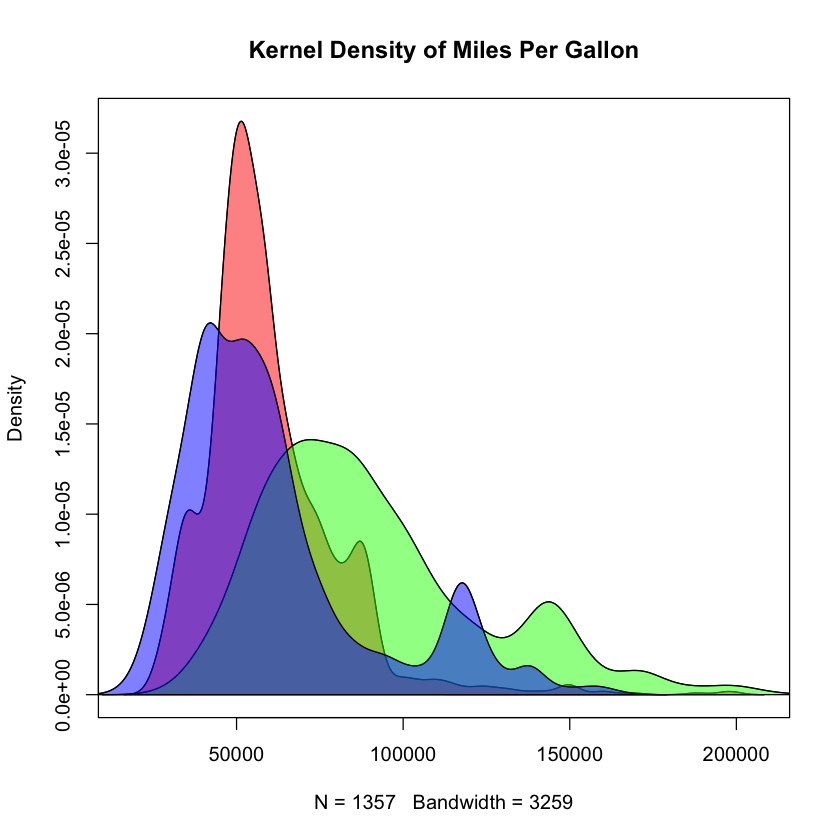

In [84]:
min_annual <- density(cdata_annual[['min']])
max_annual <- density(cdata_annual[['max']])
medium_annual <- density(cdata_annual[['medium']])


plot(min_annual, main="Kernel Density of Miles Per Gallon")
lines(max_annual)
lines(medium_annual)
polygon(min_annual, col=rgb(1, 0, 0, 0.5))
polygon(max_annual, col=rgb(0, 1, 0, 0.5))
polygon(medium_annual, col=rgb(0, 0, 1, 0.5))

In [60]:
plot()

ERROR: Error in xy.coords(x, y, xlabel, ylabel, log): аргумент "x" пропущен, умолчаний нет


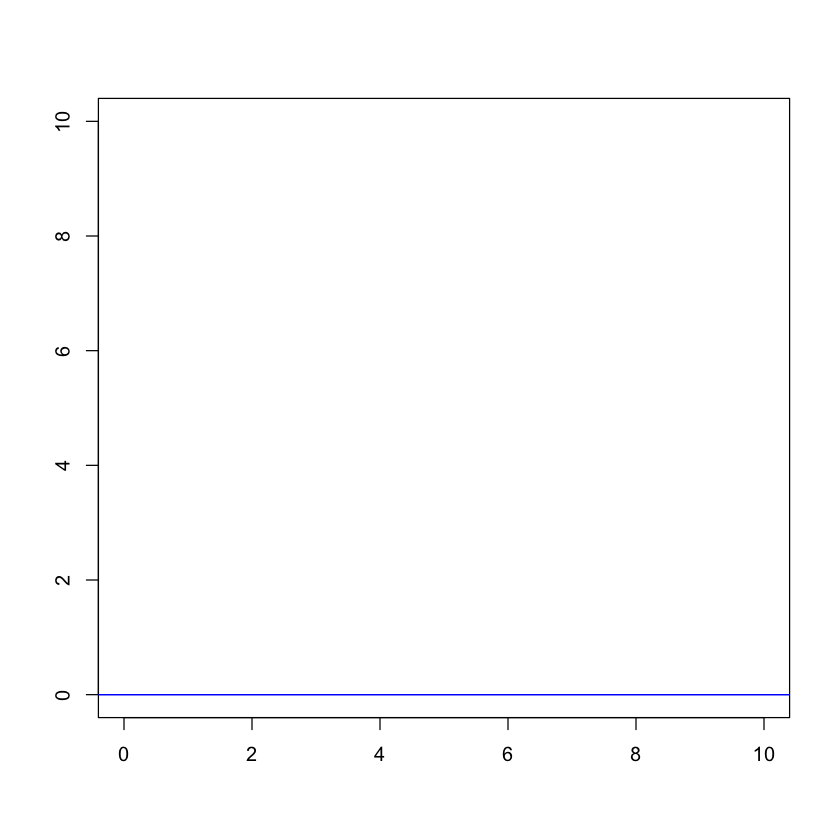

In [63]:
plot(1, type="n", xlab="", ylab="", xlim=c(0, 10), ylim=c(0, 10))
polygon(d, col="red", border="blue")
polygon(d1, col="blue", border="blue")

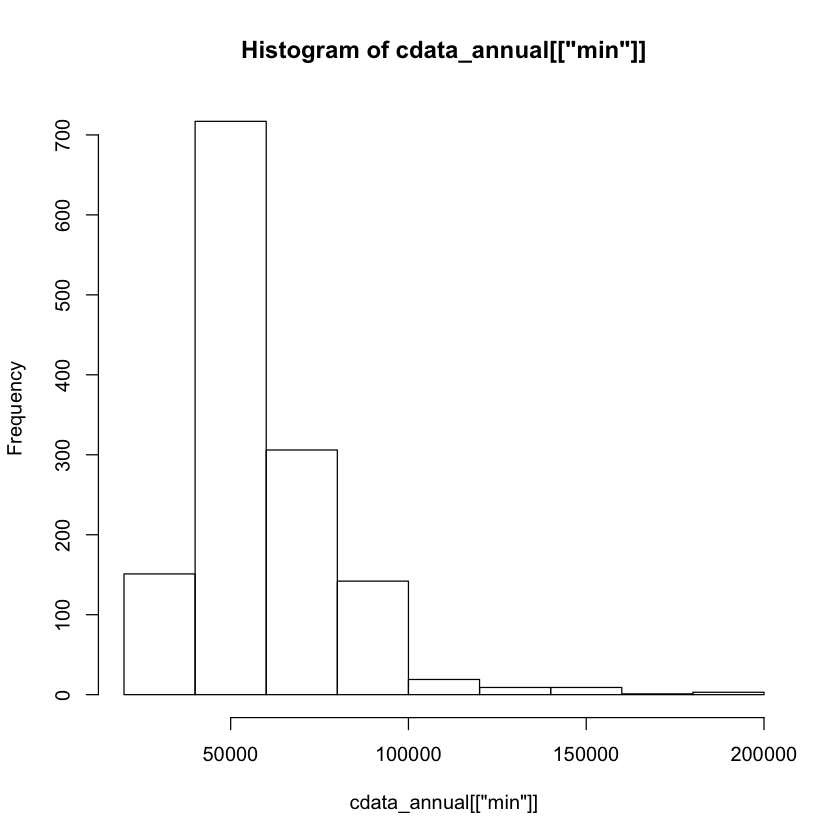

In [89]:
hist (cdata_annual[['min']])

In [88]:
min_annual


Call:
	density.default(x = cdata_annual[["min"]])

Data: cdata_annual[["min"]] (1357 obs.);	Bandwidth 'bw' = 3259

       x                y            
 Min.   : 16221   Min.   :1.360e-09  
 1st Qu.: 64239   1st Qu.:1.618e-07  
 Median :112258   Median :5.305e-07  
 Mean   :112258   Mean   :5.201e-06  
 3rd Qu.:160276   3rd Qu.:8.215e-06  
 Max.   :208294   Max.   :3.176e-05  

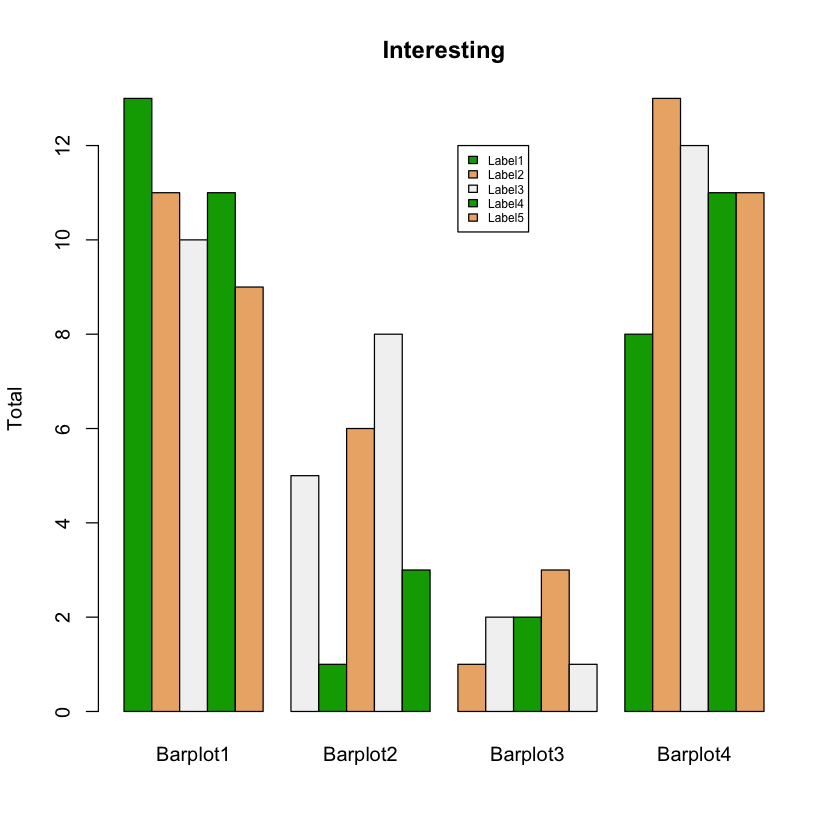

In [91]:
mydata <- data.frame(Barplot1=rbinom(5,16,0.6), Barplot2=rbinom(5,16,0.25),
                     Barplot3=rbinom(5,5,0.25), Barplot4=rbinom(5,16,0.7))
barplot(as.matrix(mydata), main="Interesting", ylab="Total", beside=TRUE, 
        col=terrain.colors(3))
legend(13, 12, c("Label1","Label2","Label3","Label4","Label5"), cex=0.6, 
       fill=terrain.colors(3))

In [92]:
mydata

,Barplot1,Barplot2,Barplot3,Barplot4
1,13,5,1,8
2,11,1,2,13
3,10,6,2,12
4,11,8,3,11
5,9,3,1,11


In [95]:
# Grouped Bar Plot
barplot(cdata_annual, main="Car Distribution by Gears and VS",
  xlab="Number of Gears", col=c("darkblue","red", "yellow"),
legend = rownames(counts), beside=TRUE)

ERROR: Error in barplot.default(cdata_annual, main = "Car Distribution by Gears and VS", : 'height' must be a vector or a matrix


In [ ]:
counts

In [97]:
barplot(cdata_annual)

ERROR: Error in barplot.default(cdata_annual): 'height' must be a vector or a matrix


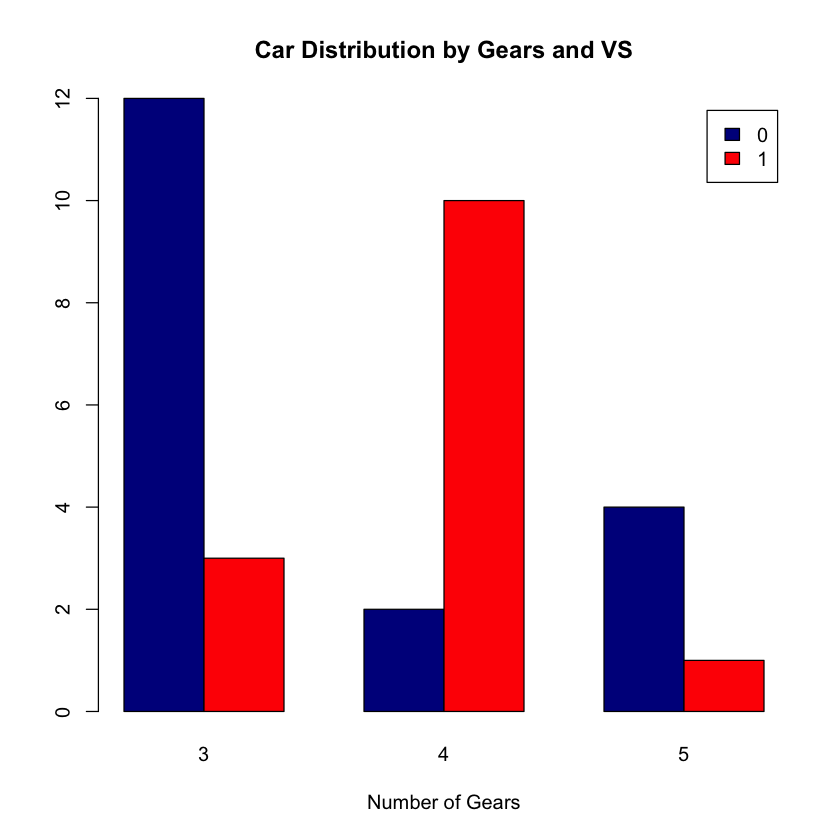

In [99]:
# Grouped Bar Plot
counts <- table(mtcars$vs, mtcars$gear)
barplot(counts, main="Car Distribution by Gears and VS",
  xlab="Number of Gears", col=c("darkblue","red"),
 	legend = rownames(counts), beside=TRUE)

In [100]:
counts

   
     3  4  5
  0 12  2  4
  1  3 10  1

ERROR: Error in eval(expr, envir, enclos): не могу найти функцию "ggplot"


In [2]:
library(ggplot2)

In [3]:
carrots <- cdata_annual[['min']]
cukes <- cdata_annual[['max']]


#Now, combine your two dataframes into one.  First make a new column in each.
carrots$veg <- 'carrot'
cukes$veg <- 'cuke'

#and combine into your new data frame vegLengths
vegLengths <- rbind(carrots, cukes)

#now make your lovely plot
ggplot(vegLengths, aes(length, fill = veg)) + geom_density(alpha = 0.2)


ERROR: Error in eval(expr, envir, enclos): объект 'cdata_annual' не найден


ERROR: Error in eval(expr, envir, enclos): объект 'cdata_annual' не найден


ERROR: Error in carrots$veg <- "carrot": объект 'carrots' не найден


ERROR: Error in cukes$veg <- "cuke": объект 'cukes' не найден


ERROR: Error in rbind(carrots, cukes): объект 'carrots' не найден


ERROR: Error in ggplot(vegLengths, aes(length, fill = veg)): объект 'vegLengths' не найден


ERROR: Error in is.vector(breaks): не могу найти функцию "trans_breaks"


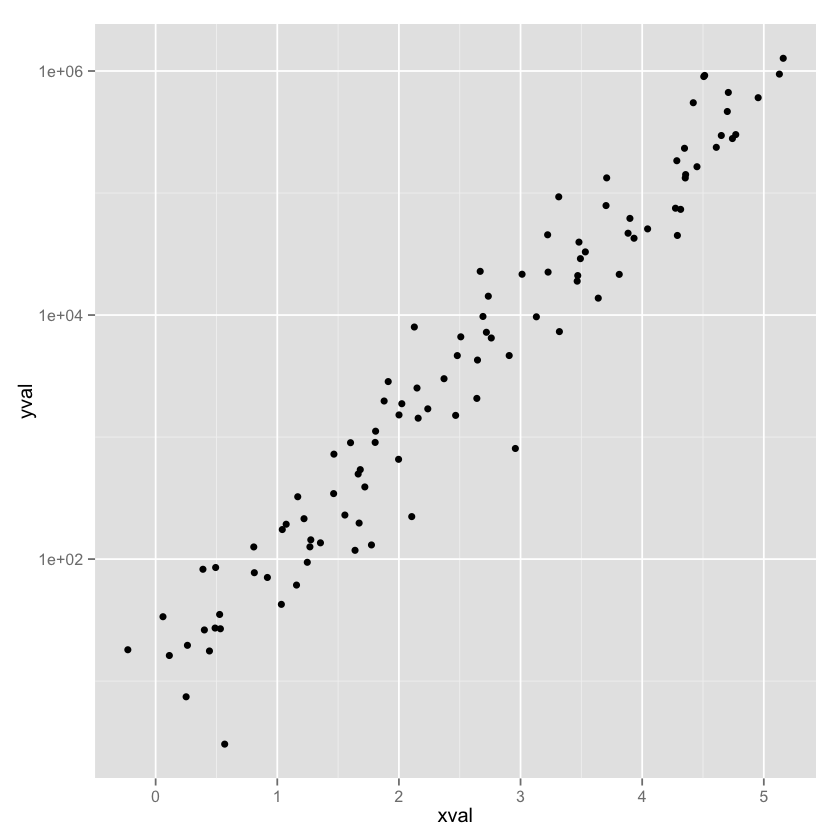

In [37]:
set.seed(205)
n <- 100
dat10 <- data.frame(
    xval = (1:n+rnorm(n,sd=5))/20,
    yval = 10*10^((1:n+rnorm(n,sd=5))/20)
)

sp10 <- ggplot(dat10, aes(xval, yval)) + geom_point()

# log10
sp10 + scale_y_log10()

# log10 with exponents on tick labels
sp10 + scale_y_log10(breaks = trans_breaks("log10", function(x) 10^x),
                     labels = trans_format("log10", math_format(10^.x)))

In [43]:
(1:200000:100)

Warning message:
In 1:2e+05:100: у числового выражения 200000 элементов: использован только первый

[1]   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
 [19]  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
 [37]  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
 [55]  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
 [73]  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
 [91]  91  92  93  94  95  96  97  98  99 100